In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,precision_score,recall_score,f1_score,roc_auc_score,roc_curve
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df=pd.read_csv('/content/Titanic_train.csv')
test_df=pd.read_csv('/content/Titanic_test.csv')

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train_df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [6]:
# Corrected code to select the 'Age' column and calculate its sum
train_df['Age'].sum()

np.float64(21205.17)

<Axes: >

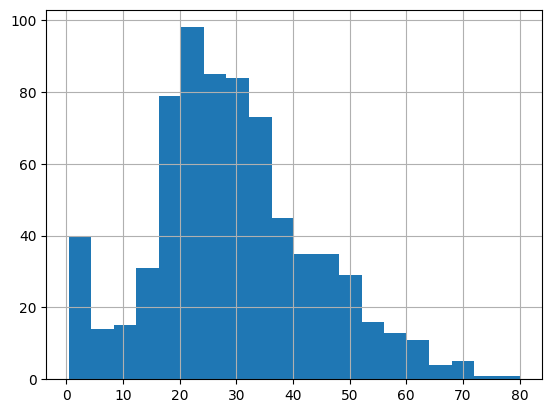

In [9]:
train_df['Age'].hist(bins=20)

<Axes: xlabel='Survived', ylabel='Fare'>

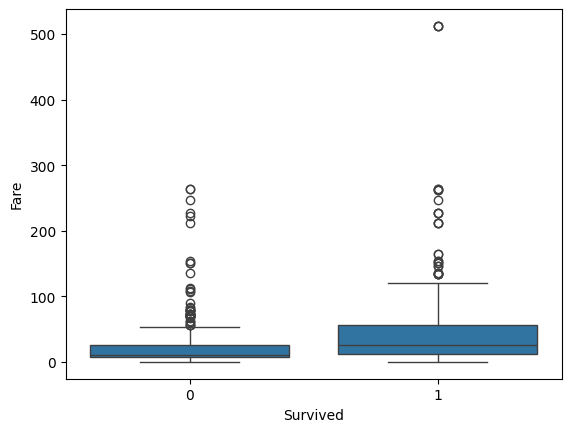

In [10]:
sns.boxplot(x='Survived', y='Fare',data=train_df)

<Axes: xlabel='Survived', ylabel='count'>

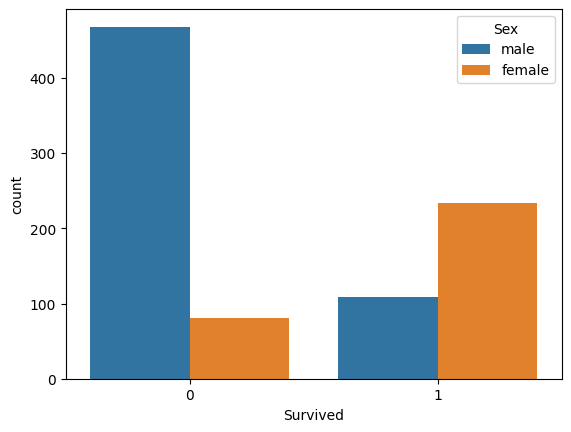

In [11]:
sns.countplot(x='Survived',hue='Sex',data=train_df)

In [15]:
train_df['Age'].fillna(train_df['Age'].median(),inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0],inplace=True)
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)

In [17]:
le=LabelEncoder()
for col in ['Sex','Embarked']:
  train_df[col]=le.fit_transform(train_df[col])
  test_df[col]=le.transform(test_df[col])

In [18]:
## drop the unused columns
drop_cols=['PassengerId','Name','Ticket','Cabin']
train_df.drop(drop_cols,axis=1,inplace=True)
test_df.drop(columns=drop_cols, inplace=True)

In [23]:
features=train_df.drop('Survived',axis=1)
target=train_df['Survived']

In [24]:
x_train,x_val,y_train,y_val=train_test_split(features,target,test_size=0.2,random_state=42)

In [25]:
model=LogisticRegression(max_iter=200)
model.fit(x_train,y_train)

LogisticRegression(max_iter=200)

In [29]:
y_pred= model.predict(x_val)
y_prob=model.predict_proba(x_val)[:,1]

In [30]:
print('Accuracy',accuracy_score(y_val,y_pred))
print('Precision',precision_score(y_val,y_pred))
print('Recall',recall_score(y_val,y_pred))
print('F1 Score',f1_score(y_val,y_pred))
print('ROC AUC Score',roc_auc_score(y_val,y_prob))

Accuracy 0.8100558659217877
Precision 0.7857142857142857
Recall 0.7432432432432432
F1 Score 0.7638888888888888
ROC AUC Score 0.8823680823680824


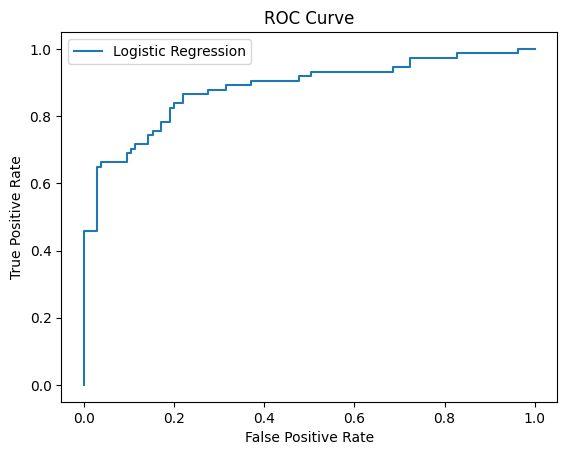

In [32]:
fpr,tpr,_=roc_curve(y_val,y_prob)
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [34]:
coeff_df = pd.DataFrame({
    'Feature': features.columns,
    'Coefficient': model.coef_[0]
})
print(coeff_df.sort_values(by='Coefficient', ascending=False))


    Feature  Coefficient
5      Fare     0.002534
2       Age    -0.030433
4     Parch    -0.111853
6  Embarked    -0.218777
3     SibSp    -0.293905
0    Pclass    -0.930680
1       Sex    -2.596994


In [44]:
import joblib
joblib.dump(model,'logistic_model.pkl')

['logistic_model.pkl']

In [37]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 39.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 1.4 MB/s eta 0:00:00


In [47]:
!streamlit run app.py




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.83.189.127:8501

  Stopping...
  Stopping...


Intriview Questions

1. Difference Between Precision and Recall


Both precision and recall are evaluation metrics for classification, especially useful in binary classification and imbalanced datasets.

| **Metric**    | **Definition**                                                   | **Formula**                  | **Interpretation**                                                                         |
| ------------- | ---------------------------------------------------------------- | ---------------------------- | ------------------------------------------------------------------------------------------ |
| **Precision** | Out of all predicted positives, how many were actually positive? | `Precision = TP / (TP + FP)` | High precision means **few false positives**. Important when **false alarms are costly**.  |
| **Recall**    | Out of all actual positives, how many did we correctly identify? | `Recall = TP / (TP + FN)`    | High recall means **few false negatives**. Important when **missing positives is costly**. |


2. What is Cross-Validation and Why Is It Important in Binary Classification?

Cross-Validation is a resampling technique used to evaluate a machine learning model’s performance on unseen data by splitting the data into multiple parts (folds).

| **Reason**                        | **Explanation**                                                                     |
| --------------------------------- | ----------------------------------------------------------------------------------- |
| **Reduces Overfitting**           | By testing on unseen data repeatedly, it checks model generalization.               |
| **Reliable Performance Estimate** | Averaging results over folds gives a more **stable, unbiased evaluation**.          |
| **Useful for Imbalanced Data**    | Stratified cross-validation maintains class distribution in each fold.              |
| **Model Tuning**                  | Helps in **hyperparameter selection** without relying on a single train-test split. |
